In [1]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from matplotlib.pylab import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
data = pd.read_csv('la-haute-borne-data-2017-2020.csv',sep=';')

In [3]:
data['Date_time'] = pd.to_datetime(data['Date_time'], utc=True)

data["date"] = pd.to_datetime(data['Date_time']).apply(lambda x: x.date())
data['monthdate'] = pd.DatetimeIndex(data['Date_time']).month
data['year'] = data['Date_time'].dt.year
data['month'] = data['Date_time'].dt.month
data['day'] = data['Date_time'].dt.day
data['year'] = data["year"].values
data['month'] = data["month"].values
data['day'] = data["day"].values

selected_columns = data[["P_avg","day","Ba_avg","Rt_avg","Yt_avg","Ws_avg","Ot_avg"]]
df = selected_columns.copy()
df.dropna(axis = 0, how ='any', inplace=True)
df = df[df['P_avg'].notna()]
df = df[df['Ba_avg'].notna()]
df = df[df['Rt_avg'].notna()]
df = df[df['Yt_avg'].notna()]
df = df[df['Ws_avg'].notna()]
df = df[df['Ot_avg'].notna()]

In [4]:
data['Date_time'] = pd.to_datetime(data['Date_time'], utc=True)

data["date"] = pd.to_datetime(data['Date_time']).apply(lambda x: x.date())
data['monthdate'] = pd.DatetimeIndex(data['Date_time']).month
data['year'] = data['Date_time'].dt.year
data['month'] = data['Date_time'].dt.month
data['day'] = data['Date_time'].dt.day
data['year'] = data["year"].values
data['month'] = data["month"].values
data['day'] = data["day"].values

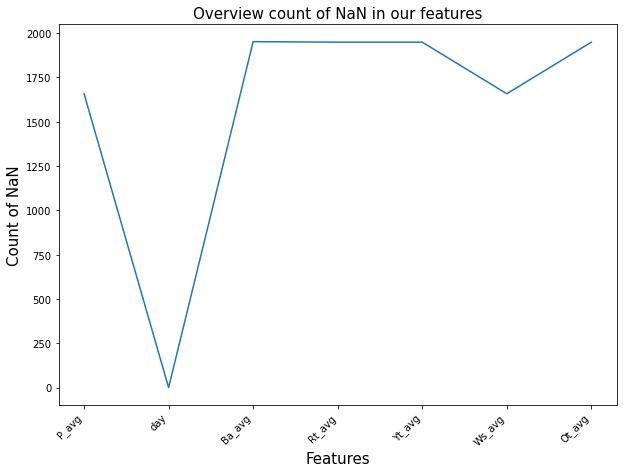

In [5]:
plt.figure(figsize=(10,7))
plt.plot(selected_columns.isnull().sum(axis = 0))
plt.xticks(rotation=90)
plt.title('Overview count of NaN in our features', fontsize=15)
plt.ylabel('Count of NaN', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.savefig('Nans.png', bbox_inches="tight", pad_inches=0.0)
plt.show()
plt.close()

In [6]:
temp = data.sort_values(by=["Date_time"], ascending=False) # temperature

In [7]:
temp["Ot_avg"]

79411     2.71
212607    2.42
208260    2.47
175989    2.58
78574     2.68
          ... 
140903    4.37
164341    3.46
115585    3.17
60539     3.83
125374    4.33
Name: Ot_avg, Length: 217588, dtype: float64

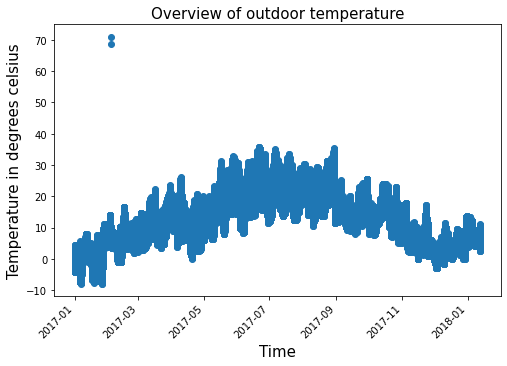

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(temp["Date_time"],temp["Ot_avg"])
plt.xticks(rotation=90)
plt.title('Overview of outdoor temperature', fontsize=15)
plt.ylabel('Temperature in degrees celsius', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.savefig('Nans.png', bbox_inches="tight", pad_inches=0.0)
plt.show()
plt.close()

In [9]:
mask = (temp["P_avg"]<-5)
below1 = temp[mask]

In [10]:
print(len(temp["P_avg"]), " ", len(below1))

217588   2670


In [11]:
temp["P_avg"] = temp["P_avg"].clip(lower=0)
temp = temp.sort_values(by=["Date_time"], inplace=False)

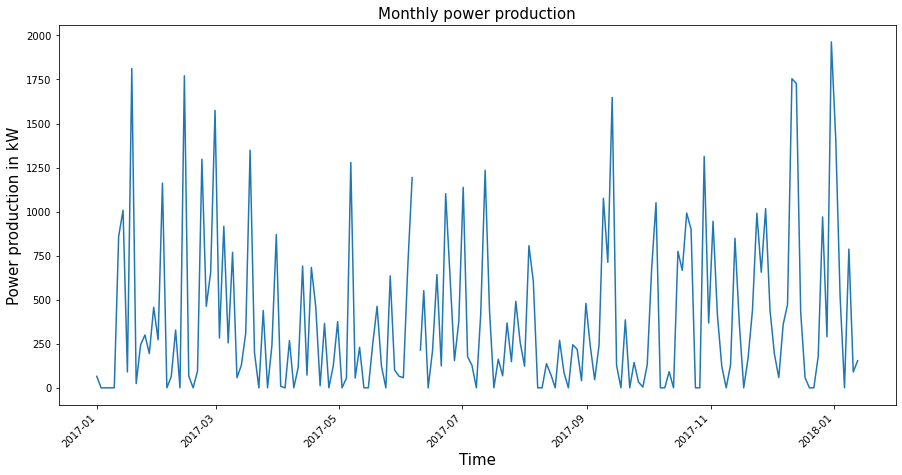

In [12]:
plt.figure(figsize=(15,7))
plt.plot(temp["Date_time"][::1250],temp["P_avg"][::1250])
plt.xticks(rotation=90)
plt.title('Monthly power production', fontsize=15)
plt.ylabel('Power production in kW', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.close()

In [13]:
data["P_avg"] = data["P_avg"].clip(lower=0)

selected_columns = data[["P_avg","Ba_avg","Rt_avg","Yt_avg","Ws_avg","Ot_avg"]]
df = selected_columns.copy()
df.dropna(axis = 0, how ='any', inplace=True)
df = df[df['P_avg'].notna()]
df = df[df['Ba_avg'].notna()]
df = df[df['Rt_avg'].notna()]
df = df[df['Yt_avg'].notna()]
df = df[df['Ws_avg'].notna()]
df = df[df['Ot_avg'].notna()]

df["Ot_avg"] = df["Ot_avg"].clip(upper=36)

In [14]:
# splitting the data
df = df.sort_values(by="Date_time")

x = df[["Ba_avg","Rt_avg","Yt_avg","Ws_avg","Ot_avg"]]
y = df['P_avg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) #80-20 split

In [15]:
LR = linear_model.LinearRegression()

# fitting the training data
modelLR = LR.fit(x_train.values,y_train.values)

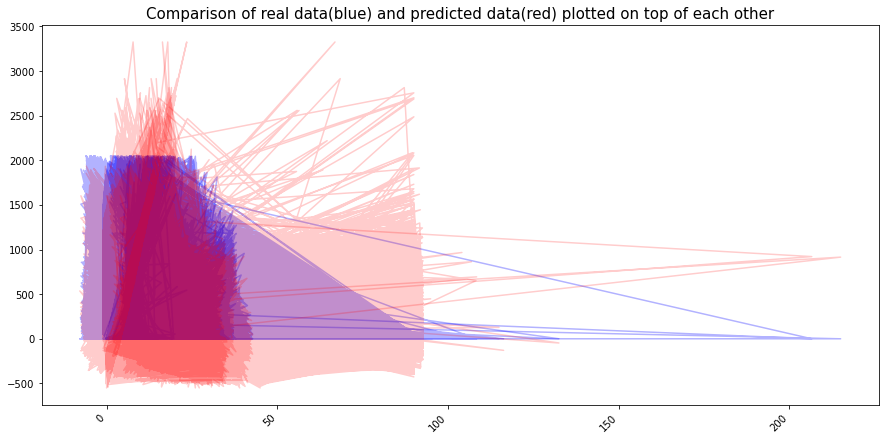

In [19]:
plt.figure(figsize=(15,7))
plt.plot(x_test.values, y_test.values, color = 'blue', alpha=0.3)
plt.plot(x_test.values, modelLR.predict(x_test.values), color = 'red', alpha=0.2)
plt.title('Comparison of real data(blue) and predicted data(red) plotted on top of each other', fontsize=15)
plt.xticks(rotation=90)
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
LR_predict = LR.predict(x_test.values)
sort = data.sort_values(by=["Date_time"], inplace=False)
time = sort["Date_time"]
lasttwentyPecent = time.iloc[int(-43128):]

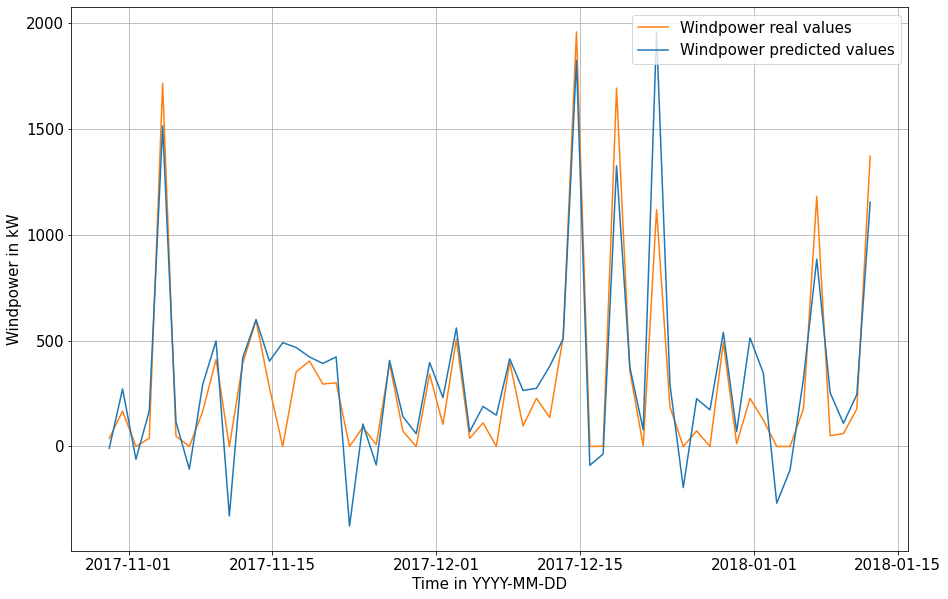

In [26]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(15, 10))

x1 = lasttwentyPecent[::750]
y1 = y_test[::750]
y2 = LR_predict[::750]

ax.plot(x1, y1, color='tab:orange', label='Windpower real values')
ax.plot(x1, y2, color='tab:blue', label='Windpower predicted values')
ax.set_xlabel('Time in YYYY-MM-DD')
ax.set_ylabel('Windpower in kW')
ax.set_title('')
ax.grid(True)
ax.legend(loc='upper right');